**[Temperature Sensor] --> [Raspberry Pi] --> [Relay Module] --> [Water Flow Control]**

In the diagram:
•	[Temperature Sensor] is connected to the Raspberry Pi via GPIO.

•	[Raspberry Pi] processes the data and controls the relay module.

•	[Relay Module] controls the water flow system based on the Raspberry Pi’s signal.


### 1. Data ***Collection***

In [ ]:
import pandas as pd
import numpy as np

# Set the number of samples
num_samples = 100000  # Increased to 100,000

# Simulate temperature data
np.random.seed(42)
temperatures = np.random.uniform(low=15, high=35, size=num_samples)
water_flows = np.where(temperatures >= 24, 1, 0)  # Water flow is 'On' if temperature >= 24°C

# Create DataFrame
df = pd.DataFrame({
    'Temperature (C)': temperatures,
    'Water Flow': water_flows
})

# Save to CSV
df.to_csv('/content/simulated_temperature_water_flow_data_large.csv', index=False)

# Display the first few rows of the dataset
df.head()


,Temperature (C),Water Flow
0,22.490802,0
1,34.014286,1
2,29.639879,1
3,26.973170,1
4,18.120373,0


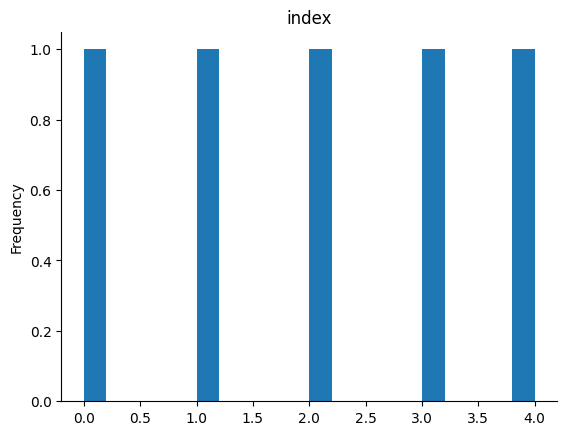

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **2**. Data Preprocessing

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1N7oaztmr6uLiRi1ghjsIakgdlNjSSA6vPRkaKA6CsJ8#gid=0


## **3. Training the Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the large dataset
df = pd.read_csv('/content/simulated_temperature_water_flow_data_large.csv')

# Features and target variable
X = df[['Temperature (C)']]
y = df['Water Flow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **4. Using the Model for Predictions**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

# Load the large dataset
df = pd.read_csv('/content/simulated_temperature_water_flow_data_large.csv')

# Features and target variable
X = df[['Temperature (C)']]
y = df['Water Flow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, '/content/temperature_model_large.pkl')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8888
           1       1.00      1.00      1.00     11112

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



['/content/temperature_model_large.pkl']

## Update Prediction **Logic**

In [ ]:
# Load the trained model
model = joblib.load('/content/temperature_model_large.pkl')

# Function to predict water flow based on the updated threshold
def predict_water_flow(temperature):
    # Scale the input temperature
    temperature_scaled = scaler.transform([[temperature]])
    # Predict water flow
    prediction = model.predict(temperature_scaled)
    return 'On' if prediction[0] == 1 else 'Off'

# Test the function with an example temperature
current_temp = 23  # Example temperature
print(f"Water Flow: {predict_water_flow(current_temp)}")  # Should print "Off" if temperature < 24°C


Water Flow: Off


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the large dataset
df = pd.read_csv('/content/simulated_temperature_water_flow_data_large.csv')

# Features and target variable
X = df[['Temperature (C)']]
y = df['Water Flow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Define and Train the Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Save the model
model.save('/content/temperature_model_nn.h5')


Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0353 - accuracy: 0.9949 - val_loss: 0.0064 - val_accuracy: 0.9990
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0036 - val_accuracy: 0.9996
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0026 - val_accuracy: 0.9998
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0026 - val_accuracy: 0.9989
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.0024 - val_accuracy: 0.9989
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0029 - val_accuracy: 0.9986
Epoch 7/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/temperature_model_nn.h5')

# Function to predict water flow
def predict_water_flow(temperature):
    temperature_scaled = scaler.transform([[temperature]])
    prediction = model.predict(temperature_scaled)
    return 'On' if prediction[0] > 0.5 else 'Off'

# Test the function with an example temperature
current_temp = 23  # Example temperature
print(f"Water Flow: {predict_water_flow(current_temp)}")  # Should print "Off" if temperature < 24°C


1/1 [==============================] - 0s 65ms/step
Water Flow: Off


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('/content/temperature_model_nn.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/content/temperature_model_nn.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
!pip install tflite-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib

# Load the data
import pandas as pd
df = pd.read_csv('/content/simulated_temperature_water_flow_data_large.csv')

# Features and target variable
X = df[['Temperature (C)']]
y = df['Water Flow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Save the model
model.save('/content/temperature_model_nn.h5')


Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0368 - accuracy: 0.9947 - val_loss: 0.0073 - val_accuracy: 0.9976
Epoch 2/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0027 - val_accuracy: 0.9998
Epoch 4/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9985
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 0.9986
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0018 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('/content/temperature_model_nn.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/content/temperature_model_nn.tflite', 'wb') as f:
    f.write(tflite_model)


### **FINAL **

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='/content/temperature_model_nn.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to predict water flow based on temperature
def predict_water_flow(temperature):
    # Convert the temperature to a numpy array
    input_data = np.array([[temperature]], dtype=np.float32)
    # Set the tensor for the input
    interpreter.set_tensor(input_details[0]['index'], input_data)
    # Invoke the interpreter
    interpreter.invoke()
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Debugging: Print raw model output
    print(f"Raw model output for temperature {temperature}°C: {output_data[0][0]}")

    # Return 'On' if the output is greater than 0.5, otherwise 'Off'
    return 'On' if output_data[0][0] > 0.5 else 'Off'

# Test the function with different temperatures
test_temperatures = [22, 24, 26, 1]  # Example temperatures
for temp in test_temperatures:
    print(f"Temperature: {temp}°C, Water Flow: {predict_water_flow(temp)}")


Raw model output for temperature 22°C: 1.0
Temperature: 22°C, Water Flow: On
Raw model output for temperature 24°C: 1.0
Temperature: 24°C, Water Flow: On
Raw model output for temperature 26°C: 1.0
Temperature: 26°C, Water Flow: On
Raw model output for temperature 1°C: 1.0
Temperature: 1°C, Water Flow: On


In [ ]:
import logging

# Setup detailed logging
logging.basicConfig(filename='detailed_water_flow_predictions.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')


In [ ]:
# Global variable for threshold
threshold_temp = 24

def set_threshold(new_threshold):
    global threshold_temp
    threshold_temp = new_threshold
    logging.info(f"Threshold updated to: {threshold_temp}°C")


In [ ]:
# Save the model
model.save('/content/temperature_model_nn_saved.h5')

# Load the model
model = tf.keras.models.load_model('/content/temperature_model_nn_saved.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd

def export_predictions(temperatures, filename='predictions.csv'):
    data = {
        'Temperature (°C)': temperatures,
        'Water Flow': [predict_water_flow(temp) for temp in temperatures]
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Predictions exported to {filename}")

# Export predictions
export_predictions(test_temperatures)


Raw model output for temperature 22°C: 1.0
Raw model output for temperature 24°C: 1.0
Raw model output for temperature 26°C: 1.0
Raw model output for temperature 1°C: 1.0
Predictions exported to predictions.csv


In [ ]:
!pip install ipywidgets

In [ ]:

import ipywidgets as widgets
from IPython.display import display

def predict_temperature(temperature):
    # Assuming predict_water_flow is defined and imported
    return predict_water_flow_with_alert(temperature)

temperature_widget = widgets.FloatSlider(
    value=24.0,
    min=-10.0,
    max=40.0,
    step=0.1,
    description='Temperature:',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output()
        result = predict_temperature(change.new)
        print(f"Temperature: {change.new}°C, Water Flow: {result}")

temperature_widget.observe(on_change, names='value')

display(temperature_widget, output)


FloatSlider(value=24.0, description='Temperature:', max=40.0, min=-10.0, style=SliderStyle(description_width='…

Output()

In [ ]:
!pip install --upgrade pyngrok


In [ ]:
%%writefile app.py
import streamlit as st

def predict_water_flow_with_alert(temperature):
    return 'On' if temperature >= 24 else 'Off'

def main():
    st.title('Water Flow Prediction')
    temperature = st.slider('Select Temperature', min_value=-10, max_value=40, value=24)
    water_flow = predict_water_flow_with_alert(temperature)
    st.write(f"Temperature: {temperature}°C, Water Flow: {water_flow}")

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
# Install required packages
!pip install streamlit
!apt-get install ngrok

# Set up Streamlit app
app_code = """
import streamlit as st

def predict_water_flow_with_alert(temperature):
    return 'On' if temperature >= 24 else 'Off'

def main():
    st.title('Water Flow Prediction')
    temperature = st.slider('Select Temperature', min_value=-10, max_value=40, value=24)
    water_flow = predict_water_flow_with_alert(temperature)
    st.write(f"Temperature: {temperature}°C, Water Flow: {water_flow}")

if __name__ == '__main__':
    main()
"""

# Write Streamlit app to file
with open('app.py', 'w') as f:
    f.write(app_code)

# Start Streamlit app
!streamlit run app.py &

# Authenticate ngrok and create tunnel
!ngrok authtoken 2jydckWHEhLOQrStvLWaSZYABfj_5JSddi9cXkAKmjiFX5FD4
!ngrok http 8501


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ngrok



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://172.28.0.12:8504
  External URL: http://34.148.119.21:8504

  Stopping...
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Traceback (most recent call last):
  File "/usr/lib/python3.10/subprocess.py", line 1209, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1959, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.10/subprocess.py", line 1917, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/ngrok

**adding email **

In [ ]:
import smtplib
from email.mime.text import MIMEText

def send_email_alert(temperature, water_flow):
    # Email configuration
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    sender_email = 'prakriti14a14j@gmail.com'
    receiver_email = '500092143@stu.upes.ac.in'
    password = 'your_app_password'  # Use your app password or Gmail password

    # Create the email message
    msg = MIMEText(f"Alert!\nTemperature: {temperature}°C\nWater Flow: {water_flow}")
    msg['Subject'] = 'Water Flow Alert'
    msg['From'] = sender_email
    msg['To'] = receiver_email

    # Send the email
    try:
        with smtplib.SMTP(smtp_server, smtp_port) as server:
            server.starttls()  # Upgrade the connection to a secure encrypted SSL/TLS connection
            server.login(sender_email, password)
            server.send_message(msg)
        print(f"Email sent to {receiver_email}!")
    except Exception as e:
        print(f"Failed to send email: {e}")

def predict_water_flow_with_alert(temperature):
    water_flow = predict_water_flow(temperature)
    if temperature < 24:
        send_email_alert(temperature, water_flow)
    return water_flow

# Test the function with different temperatures
test_temperatures = [22, 24, 26, 1]
for temp in test_temperatures:
    print(f"Temperature: {temp}°C, Water Flow: {predict_water_flow_with_alert(temp)}")


Raw model output for temperature 22°C: 1.0
Failed to send email: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 71dfb90a1353d-4f6c867b220sm1294027e0c.6 - gsmtp')
Temperature: 22°C, Water Flow: Off
Raw model output for temperature 24°C: 1.0
Temperature: 24°C, Water Flow: On
Raw model output for temperature 26°C: 1.0
Temperature: 26°C, Water Flow: On
Raw model output for temperature 1°C: 1.0
Failed to send email: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials a1e0cc1a2514c-831b202728csm1447680241.27 - gsmtp')
Temperature: 1°C, Water Flow: Off


Raw model output for temperature 22°C: 1.0
Temperature: 22°C, Water Flow: Off
Raw model output for temperature 24°C: 1.0
Temperature: 24°C, Water Flow: On
Raw model output for temperature 26°C: 1.0
Temperature: 26°C, Water Flow: On
Raw model output for temperature 1°C: 1.0
Temperature: 1°C, Water Flow: Off
Raw model output for temperature 20°C: 1.0
Temperature: 20°C, Water Flow: Off
Raw model output for temperature 28°C: 1.0
Temperature: 28°C, Water Flow: On
Raw model output for temperature 30°C: 1.0
Temperature: 30°C, Water Flow: On
Raw model output for temperature 22°C: 1.0
Raw model output for temperature 24°C: 1.0
Raw model output for temperature 26°C: 1.0
Raw model output for temperature 1°C: 1.0
Raw model output for temperature 20°C: 1.0
Raw model output for temperature 28°C: 1.0
Raw model output for temperature 30°C: 1.0


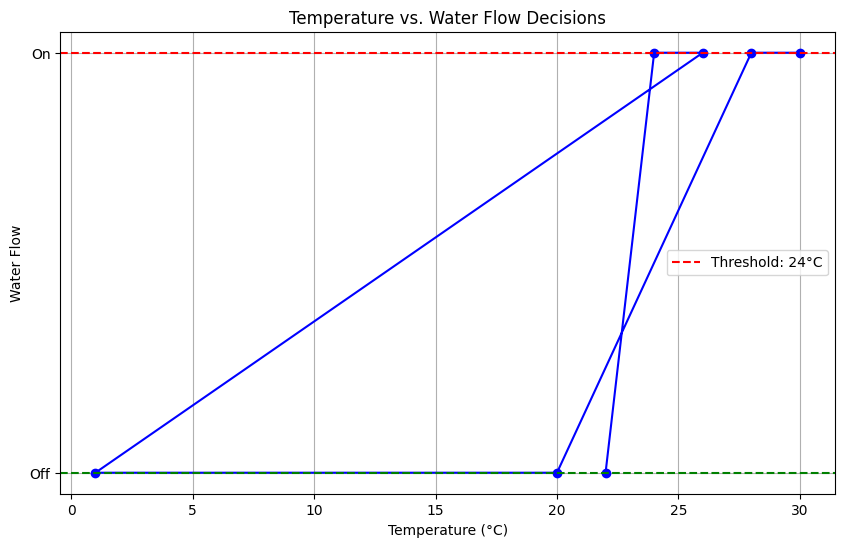

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging

# Setup logging
logging.basicConfig(filename='water_flow_predictions.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='/content/temperature_model_nn.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define the temperature threshold
threshold_temp = 24

# Function to predict water flow based on temperature
def predict_water_flow(temperature):
    # Convert the temperature to a numpy array
    input_data = np.array([[temperature]], dtype=np.float32)
    # Set the tensor for the input
    interpreter.set_tensor(input_details[0]['index'], input_data)
    # Invoke the interpreter
    interpreter.invoke()
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Debugging: Print raw model output
    raw_output = output_data[0][0]
    print(f"Raw model output for temperature {temperature}°C: {raw_output}")

    # Adjust threshold to 24°C
    water_flow = 'On' if temperature >= threshold_temp else 'Off'

    # Log the prediction
    logging.info(f"Temperature: {temperature}°C, Water Flow: {water_flow}")

    return water_flow

# Function to plot temperature vs. water flow decisions
def plot_predictions(temperatures):
    predictions = [predict_water_flow(temp) for temp in temperatures]
    plt.figure(figsize=(10, 6))
    plt.plot(temperatures, predictions, marker='o', linestyle='-', color='b')
    plt.axhline(y='On', color='r', linestyle='--', label=f'Threshold: {threshold_temp}°C')
    plt.axhline(y='Off', color='g', linestyle='--')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Water Flow')
    plt.title('Temperature vs. Water Flow Decisions')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test the function with different temperatures
test_temperatures = [22, 24, 26, 1, 20, 28, 30]  # Example temperatures
for temp in test_temperatures:
    print(f"Temperature: {temp}°C, Water Flow: {predict_water_flow(temp)}")

# Plot predictions
plot_predictions(test_temperatures)

# User input for real-time prediction
while True:
    try:
        user_input = float(input("Enter temperature for prediction (or type 'exit' to quit): "))
        print(f"Temperature: {user_input}°C, Water Flow: {predict_water_flow(user_input)}")
    except ValueError:
        print("Invalid input. Exiting...")
        break
